In [1]:
pip install ucimlrepo

In [2]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing, metrics, model_selection
import pandas as pd

from ucimlrepo import fetch_ucirepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
df_X = optical_recognition_of_handwritten_digits.data.features
df_y = optical_recognition_of_handwritten_digits.data.targets


[[ 0  0  1  4 11 13  7  0]
 [ 0  2 14 12 10 16  5  0]
 [ 0  7 14  6 14 12  0  0]
 [ 0  2 12 11 10 15  1  0]
 [ 0  0  0  0  0 16  4  0]
 [ 0  0  0  0  3 16  3  0]
 [ 0  0  0  0 10 11  0  0]
 [ 0  0  0  1 14  3  0  0]]
es un  9


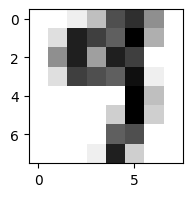

In [4]:
id=23
digito = np.array(df_X.iloc[id, :]).reshape(8,8)
print(digito)

print("es un " , df_y['class'].iloc[id])

plt.figure(figsize=(2,2))
plt.imshow(digito, cmap=plt.cm.gray_r)



In [5]:
X = np.array(df_X)
Y = np.array(df_y['class'])
Y_bin= to_categorical(Y)

print(Y)


[0 0 7 ... 8 9 8]


In [6]:
Y_bin[[2,3,60,70,120],:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [7]:
#--- CONJUNTOS DE ENTRENAMIENTO Y TESTEO ---
#X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y_bin, test_size=0.20) #, random_state=42)
X_train = X[:3823,:]
Y_train = Y_bin[:3823,:]

X_test = X[3823:,:]
Y_test = Y_bin[3823:,:]


In [8]:
normalizarEntrada = 1  # 1 si normaliza; 0 si no

if normalizarEntrada:
    # Escala los valores entre 0 y 1
    min_max_scaler = preprocessing.StandardScaler()
    X_train = min_max_scaler.fit_transform(X_train)
    X_test = min_max_scaler.transform(X_test)

### Definición del modelo

In [9]:

# Crear un modelo de capas secuenciales
model=Sequential()

# Agregar las capas al modelo
model.add(Input(shape=(64,)))
model.add(Dense(15, activation='tanh'))
model.add(Dense(10, activation='softmax'))

# Imprimir un resumen del modelo
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 15)                  │             975 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,135 (4.43 KB)

 Trainable params: 1,135 (4.43 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Configuración para entrenamiento
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.compile(optimizer=SGD(learning_rate=0.05), loss='categorical_crossentropy', metrics=['accuracy'])



In [11]:
# model.fit(X_train,Y_trainB, epochs=500)

es = EarlyStopping(monitor='val_accuracy', patience=30, min_delta=1e-08, restore_best_weights=True)

H = model.fit(x = X_train, y = Y_train, epochs=4000, batch_size = 200,
              validation_data = (X_test, Y_test),  callbacks=[es])



Epoch 1/4000
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.1207 - loss: 2.3926 - val_accuracy: 0.3756 - val_loss: 1.8436
Epoch 2/4000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5140 - loss: 1.6266 - val_accuracy: 0.5954 - val_loss: 1.4298
Epoch 3/4000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6658 - loss: 1.2982 - val_accuracy: 0.7056 - val_loss: 1.1927
Epoch 4/4000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7551 - loss: 1.0707 - val_accuracy: 0.7718 - val_loss: 1.0337
Epoch 5/4000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7932 - loss: 0.9363 - val_accuracy: 0.8024 - val_loss: 0.9169
Epoch 6/4000
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8452 - loss: 0.7971 - val_accuracy: 0.8264 - val_loss: 0.8240
Epoch 7/4000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8682 - loss: 0.7309 - val_accuracy: 0.8470 - val_loss: 0.7477
Epoch 8/4000
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8810 - loss: 0.6633 - val_accura

In [12]:
print("épocas = %d" % len(H.history["val_accuracy"]))
print("Epocas = %d" % es.stopped_epoch)

épocas = 112
Epocas = 111


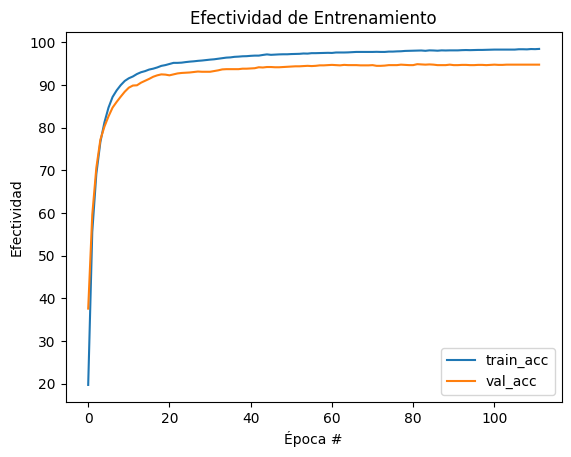

In [13]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["accuracy"])
val_accuracy = np.array(H.history["val_accuracy"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_acc")
plt.plot(N, 100*val_accuracy, label="val_acc")
plt.title("Efectividad de Entrenamiento")
plt.xlabel("Época #")
plt.ylabel("Efectividad")
plt.legend(loc="lower right")

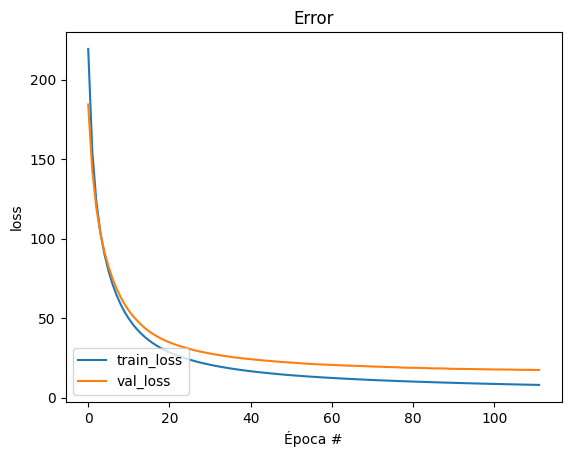

In [14]:
# dibuja accuracy del progreso del entrenamiento
accuracy = np.array(H.history["loss"])
val_accuracy = np.array(H.history["val_loss"])

N = np.arange(0, len(accuracy))
plt.figure()
#plt.plot(N, H.history["loss"], label="train_loss")
#plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, 100*accuracy, label="train_loss")
plt.plot(N, 100*val_accuracy, label="val_loss")
plt.title("Error")
plt.xlabel("Época #")
plt.ylabel("loss")
plt.legend(loc="lower left")

In [15]:
# predecir la salida del modelo
Y_pred = model.predict(X_train)

# Convertir la salida del modelo en un número entero
Y_pred2 = np.argmax(Y_pred,axis=1)
Y_true =  np.argmax(Y_train,axis=1)
print("%% aciertos : %.3f" % metrics.accuracy_score(Y_true, Y_pred2))
print(Y_pred[:5,:])
print(Y_pred2[:5])

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
% aciertos : 0.981
[[9.82137859e-01 2.71709032e-05 3.39354941e-04 6.62985985e-05
  7.81936396e-04 1.00984415e-02 1.97880389e-03 3.03860498e-03
  8.47845105e-04 6.83591934e-04]
 [9.89716053e-01 3.44403852e-05 1.71813328e-04 2.61455007e-05
  8.85662506e-04 6.63097482e-03 5.06417127e-04 1.21389516e-03
  1.53922010e-04 6.60497812e-04]
 [4.93243383e-03 1.39811003e-04 3.81857644e-05 2.01552015e-04
  4.77144355e-03 7.15646602e-05 1.56203547e-04 9.89178777e-01
  1.60370400e-04 3.49674228e-04]
 [2.28570122e-03 8.56219381e-02 1.45178798e-04 1.41352735e-04
  5.64303696e-01 8.32973327e-03 1.83510070e-04 6.50843279e-03
  1.35059962e-02 3.18974525e-01]
 [2.14817142e-03 7.45087687e-04 5.69523405e-03 2.08301260e-03
  4.28783474e-03 1.77765302e-02 9.50120032e-01 2.29445814e-05
  1.69938300e-02 1.27325620e-04]]
[0 0 7 4 6]


In [16]:
# Evaluación del modelo
score = model.evaluate(X_train, Y_train)

print('Error :', score[0])
print('Accuracy:', score[1])


120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9802 - loss: 0.1018
Error : 0.0990888774394989
Accuracy: 0.9806434512138367


In [17]:
report = metrics.classification_report(Y_true, Y_pred2)
print("Training metrics:\n%s" % report)

MM = metrics.confusion_matrix(Y_true, Y_pred2)
print("Confusion matrix:\n%s" % MM)

Training metrics:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       376
           1       0.97      0.97      0.97       389
           2       0.99      0.99      0.99       380
           3       0.99      0.98      0.99       389
           4       0.98      0.98      0.98       387
           5       0.98      0.99      0.98       376
           6       0.98      0.99      0.98       377
           7       0.99      0.99      0.99       387
           8       0.98      0.95      0.96       380
           9       0.97      0.97      0.97       382

    accuracy                           0.98      3823
   macro avg       0.98      0.98      0.98      3823
weighted avg       0.98      0.98      0.98      3823

Confusion matrix:
[[374   0   0   0   1   0   1   0   0   0]
 [  0 377   1   0   0   1   2   2   4   2]
 [  1   1 377   0   0   0   0   0   0   1]
 [  0   1   1 381   0   3   0   0   1   2]
 [  0   0   0   0 381   0   2   0

In [18]:
# predecir la salida del modelo
Y_pred = model.predict(X_test)
Y_pred2 = np.argmax(Y_pred,axis=1)
Y_true =  np.argmax(Y_test,axis=1)
print("%% aciertos X_train : %.3f" % metrics.accuracy_score(Y_true, Y_pred2))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
% aciertos X_train : 0.949


In [19]:
report = metrics.classification_report(Y_true, Y_pred2)

print("Dígitos de testeo :\n%s" % report)

Dígitos de testeo :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       178
           1       0.92      0.92      0.92       182
           2       0.95      0.95      0.95       177
           3       0.98      0.93      0.95       183
           4       0.95      0.97      0.96       181
           5       0.95      0.99      0.97       182
           6       0.96      0.98      0.97       181
           7       0.98      0.95      0.97       179
           8       0.92      0.87      0.89       174
           9       0.89      0.93      0.91       180

    accuracy                           0.95      1797
   macro avg       0.95      0.95      0.95      1797
weighted avg       0.95      0.95      0.95      1797



In [20]:
MM = metrics.confusion_matrix(Y_true, Y_pred2)

print("Confusion matrix:\n%s" % MM)


Confusion matrix:
[[176   0   0   0   0   1   0   0   0   1]
 [  0 168   1   0   0   0   3   0   3   7]
 [  0   3 169   3   0   0   1   0   0   1]
 [  0   0   5 170   0   1   0   1   6   0]
 [  0   1   0   0 176   0   0   1   2   1]
 [  0   0   0   0   0 180   1   0   0   1]
 [  0   1   0   0   2   0 178   0   0   0]
 [  0   0   0   0   3   1   0 170   1   4]
 [  0   9   0   0   1   4   3   0 151   6]
 [  0   1   2   1   4   2   0   1   2 167]]


In [21]:
model.save("modelo_DIGITOS.h5")